# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [62]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


In [73]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 123


## 📦 Setup and Configuration
Import required packages and setup environment.

In [124]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [95]:
import requests
from datetime import datetime
import pprint

# Configuration
OPENWEATHER_API_KEY = "aabb92d590c9b7c0c5741eae5c5768f7"
LOCATION = "Perth,AU"
UNITS = "metric"
FORECAST_DAYS = 5

def degrees_to_compass(degrees):
    """Convert wind degrees to compass direction."""
    directions = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                 "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
    return directions[round(degrees / 22.5) % 16]

def get_weather_forecast():
    """Fetch and format weather forecast from OpenWeatherMap API."""
    try:
        # API request
        url = f"http://api.openweathermap.org/data/2.5/forecast?q={LOCATION}&appid={OPENWEATHER_API_KEY}&units={UNITS}"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        # Process forecast data
        forecast = []
        current_date = None
        daily_data = {}

        for entry in data["list"]:
            entry_date = entry["dt_txt"].split()[0]

            if entry_date != current_date:
                if current_date is not None:
                    forecast.append(daily_data)
                current_date = entry_date
                daily_data = {
                    "date": current_date,
                    "day_of_week": datetime.strptime(current_date, "%Y-%m-%d").strftime("%A"),
                    "times": [],
                    "max_temp": -float('inf'),
                    "min_temp": float('inf'),
                    "conditions": set()
                }

            time_data = {
                "time": entry["dt_txt"].split()[1][:5],
                "temperature": round(entry["main"]["temp"], 1),
                "feels_like": round(entry["main"]["feels_like"], 1),
                "condition": entry["weather"][0]["description"].title(),
                "humidity": entry["main"]["humidity"],
                "wind_speed": round(entry["wind"]["speed"], 1),
                "wind_direction": degrees_to_compass(entry["wind"]["deg"]),
                "precipitation_chance": round(entry.get("pop", 0) * 100),
                "pressure": entry["main"]["pressure"],
                "cloud_coverage": entry["clouds"]["all"],
                "visibility": entry.get("visibility", "N/A")
            }

            daily_data["times"].append(time_data)
            daily_data["max_temp"] = max(daily_data["max_temp"], time_data["temperature"])
            daily_data["min_temp"] = min(daily_data["min_temp"], time_data["temperature"])
            daily_data["conditions"].add(time_data["condition"])

        if current_date and daily_data:
            forecast.append(daily_data)

        # Format the final output
        return {
            "location": f"{data['city']['name']}, {data['city']['country']}",
            "latitude": data["city"]["coord"]["lat"],
            "longitude": data["city"]["coord"]["lon"],
            "forecast_days": min(FORECAST_DAYS, len(forecast)),
            "forecast": forecast[:FORECAST_DAYS],
            "units": {
                "temperature": "°C",
                "humidity": "%",
                "wind_speed": "m/s",
                "precipitation": "% chance",
                "pressure": "hPa",
                "visibility": "meters"
            },
            "api_source": "OpenWeatherMap",
            "generated_on": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }

    except requests.exceptions.RequestException as e:
        return {"error": f"API request failed: {str(e)}"}
    except Exception as e:
        return {"error": f"An error occurred: {str(e)}"}

def display_forecast(weather_data):
    """Display the weather forecast in a user-friendly format."""
    if "error" in weather_data:
        print(f"❌ Error: {weather_data['error']}")
        return

    print(f"\n🌤 Weather Forecast for {weather_data['location']} 🌤")
    print(f"📍 Coordinates: {weather_data['latitude']}°N, {weather_data['longitude']}°E")
    print(f"📅 Generated on: {weather_data['generated_on']}")
    print("="*50)

    for day in weather_data["forecast"]:
        print(f"\n📅 {day['day_of_week']}, {day['date']}")
        print(f"🌡 Temp: {day['min_temp']}°C to {day['max_temp']}°C")
        print(f"🌦 Conditions: {', '.join(day['conditions'])}")
        print("-"*40)

        for time in day["times"]:
            print(f"⏰ {time['time']}: {time['condition']}")
            print(f"   🌡 Temp: {time['temperature']}°C (Feels like {time['feels_like']}°C)")
            print(f"   💧 Humidity: {time['humidity']}%")
            print(f"   🌬 Wind: {time['wind_speed']} m/s {time['wind_direction']}")
            print(f"   🌧 Rain chance: {time['precipitation_chance']}%")
            print(f"   ☁️ Clouds: {time['cloud_coverage']}%")
            print("-"*20)

if __name__ == "__main__":
    print("Fetching weather data...")
    weather_data = get_weather_forecast()

    # Uncomment to see raw API response
    # pp = pprint.PrettyPrinter(indent=4)
    # pp.pprint(weather_data)

    display_forecast(weather_data)

Fetching weather data...

🌤 Weather Forecast for Perth, AU 🌤
📍 Coordinates: -31.9333°N, 115.8333°E
📅 Generated on: 2025-05-23 11:22:45

📅 Friday, 2025-05-23
🌡 Temp: 9.2°C to 12.4°C
🌦 Conditions: Scattered Clouds, Clear Sky, Broken Clouds
----------------------------------------
⏰ 12:00: Clear Sky
   🌡 Temp: 12.4°C (Feels like 11.6°C)
   💧 Humidity: 75%
   🌬 Wind: 4.9 m/s SSE
   🌧 Rain chance: 0%
   ☁️ Clouds: 0%
--------------------
⏰ 15:00: Scattered Clouds
   🌡 Temp: 12.1°C (Feels like 11.1°C)
   💧 Humidity: 68%
   🌬 Wind: 4.1 m/s SE
   🌧 Rain chance: 0%
   ☁️ Clouds: 29%
--------------------
⏰ 18:00: Broken Clouds
   🌡 Temp: 9.2°C (Feels like 6.8°C)
   💧 Humidity: 58%
   🌬 Wind: 4.6 m/s ESE
   🌧 Rain chance: 0%
   ☁️ Clouds: 53%
--------------------
⏰ 21:00: Broken Clouds
   🌡 Temp: 12.3°C (Feels like 10.8°C)
   💧 Humidity: 47%
   🌬 Wind: 2.6 m/s ENE
   🌧 Rain chance: 0%
   ☁️ Clouds: 79%
--------------------

📅 Saturday, 2025-05-24
🌡 Temp: 11.9°C to 16.1°C
🌦 Conditions: Overcast Cl

## 📊 Visualisation Functions

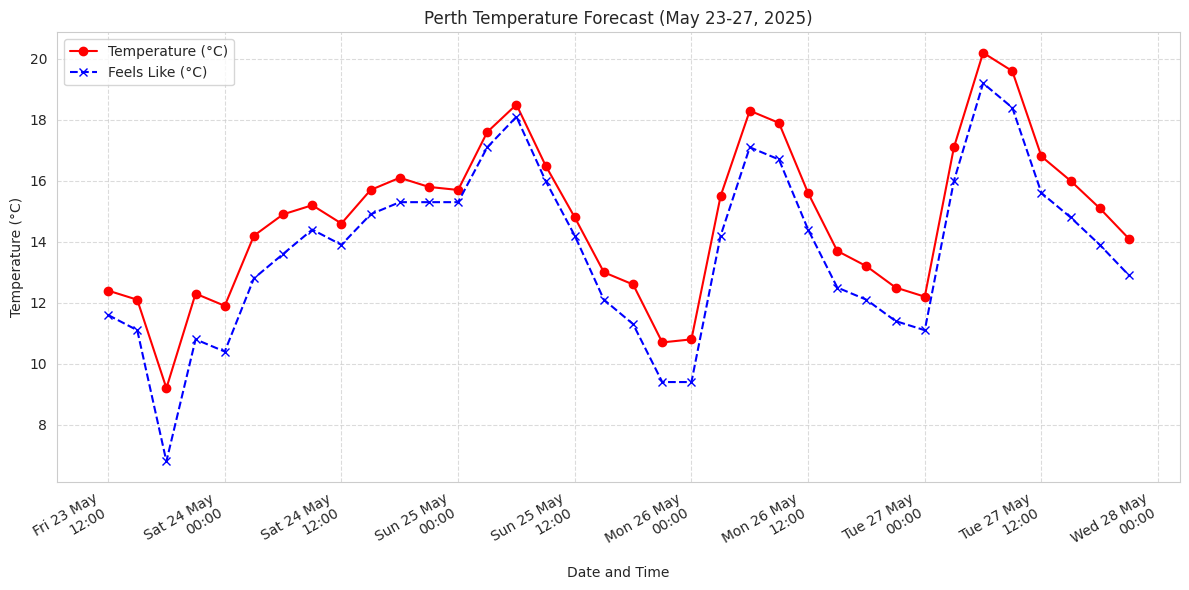

In [108]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data extracted from the weather forecast
weather_data = [
    {'time': '2025-05-23 12:00', 'temp': 12.4, 'feels_like': 11.6},
    {'time': '2025-05-23 15:00', 'temp': 12.1, 'feels_like': 11.1},
    {'time': '2025-05-23 18:00', 'temp': 9.2, 'feels_like': 6.8},
    {'time': '2025-05-23 21:00', 'temp': 12.3, 'feels_like': 10.8},
    {'time': '2025-05-24 00:00', 'temp': 11.9, 'feels_like': 10.4},
    {'time': '2025-05-24 03:00', 'temp': 14.2, 'feels_like': 12.8},
    {'time': '2025-05-24 06:00', 'temp': 14.9, 'feels_like': 13.6},
    {'time': '2025-05-24 09:00', 'temp': 15.2, 'feels_like': 14.4},
    {'time': '2025-05-24 12:00', 'temp': 14.6, 'feels_like': 13.9},
    {'time': '2025-05-24 15:00', 'temp': 15.7, 'feels_like': 14.9},
    {'time': '2025-05-24 18:00', 'temp': 16.1, 'feels_like': 15.3},
    {'time': '2025-05-24 21:00', 'temp': 15.8, 'feels_like': 15.3},
    {'time': '2025-05-25 00:00', 'temp': 15.7, 'feels_like': 15.3},
    {'time': '2025-05-25 03:00', 'temp': 17.6, 'feels_like': 17.1},
    {'time': '2025-05-25 06:00', 'temp': 18.5, 'feels_like': 18.1},
    {'time': '2025-05-25 09:00', 'temp': 16.5, 'feels_like': 16.0},
    {'time': '2025-05-25 12:00', 'temp': 14.8, 'feels_like': 14.2},
    {'time': '2025-05-25 15:00', 'temp': 13.0, 'feels_like': 12.1},
    {'time': '2025-05-25 18:00', 'temp': 12.6, 'feels_like': 11.3},
    {'time': '2025-05-25 21:00', 'temp': 10.7, 'feels_like': 9.4},
    {'time': '2025-05-26 00:00', 'temp': 10.8, 'feels_like': 9.4},
    {'time': '2025-05-26 03:00', 'temp': 15.5, 'feels_like': 14.2},
    {'time': '2025-05-26 06:00', 'temp': 18.3, 'feels_like': 17.1},
    {'time': '2025-05-26 09:00', 'temp': 17.9, 'feels_like': 16.7},
    {'time': '2025-05-26 12:00', 'temp': 15.6, 'feels_like': 14.4},
    {'time': '2025-05-26 15:00', 'temp': 13.7, 'feels_like': 12.5},
    {'time': '2025-05-26 18:00', 'temp': 13.2, 'feels_like': 12.1},
    {'time': '2025-05-26 21:00', 'temp': 12.5, 'feels_like': 11.4},
    {'time': '2025-05-27 00:00', 'temp': 12.2, 'feels_like': 11.1},
    {'time': '2025-05-27 03:00', 'temp': 17.1, 'feels_like': 16.0},
    {'time': '2025-05-27 06:00', 'temp': 20.2, 'feels_like': 19.2},
    {'time': '2025-05-27 09:00', 'temp': 19.6, 'feels_like': 18.4},
    {'time': '2025-05-27 12:00', 'temp': 16.8, 'feels_like': 15.6},
    {'time': '2025-05-27 15:00', 'temp': 16.0, 'feels_like': 14.8},
    {'time': '2025-05-27 18:00', 'temp': 15.1, 'feels_like': 13.9},
    {'time': '2025-05-27 21:00', 'temp': 14.1, 'feels_like': 12.9},
]

# Prepare the data for plotting
times = [datetime.strptime(point['time'], '%Y-%m-%d %H:%M') for point in weather_data]
temps = [point['temp'] for point in weather_data]
feels_like = [point['feels_like'] for point in weather_data]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(times, temps, 'r-', label='Temperature (°C)', marker='o')
plt.plot(times, feels_like, 'b--', label='Feels Like (°C)', marker='x')

# Format the plot
plt.title('Perth Temperature Forecast (May 23-27, 2025)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date and Time')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %d %b\n%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

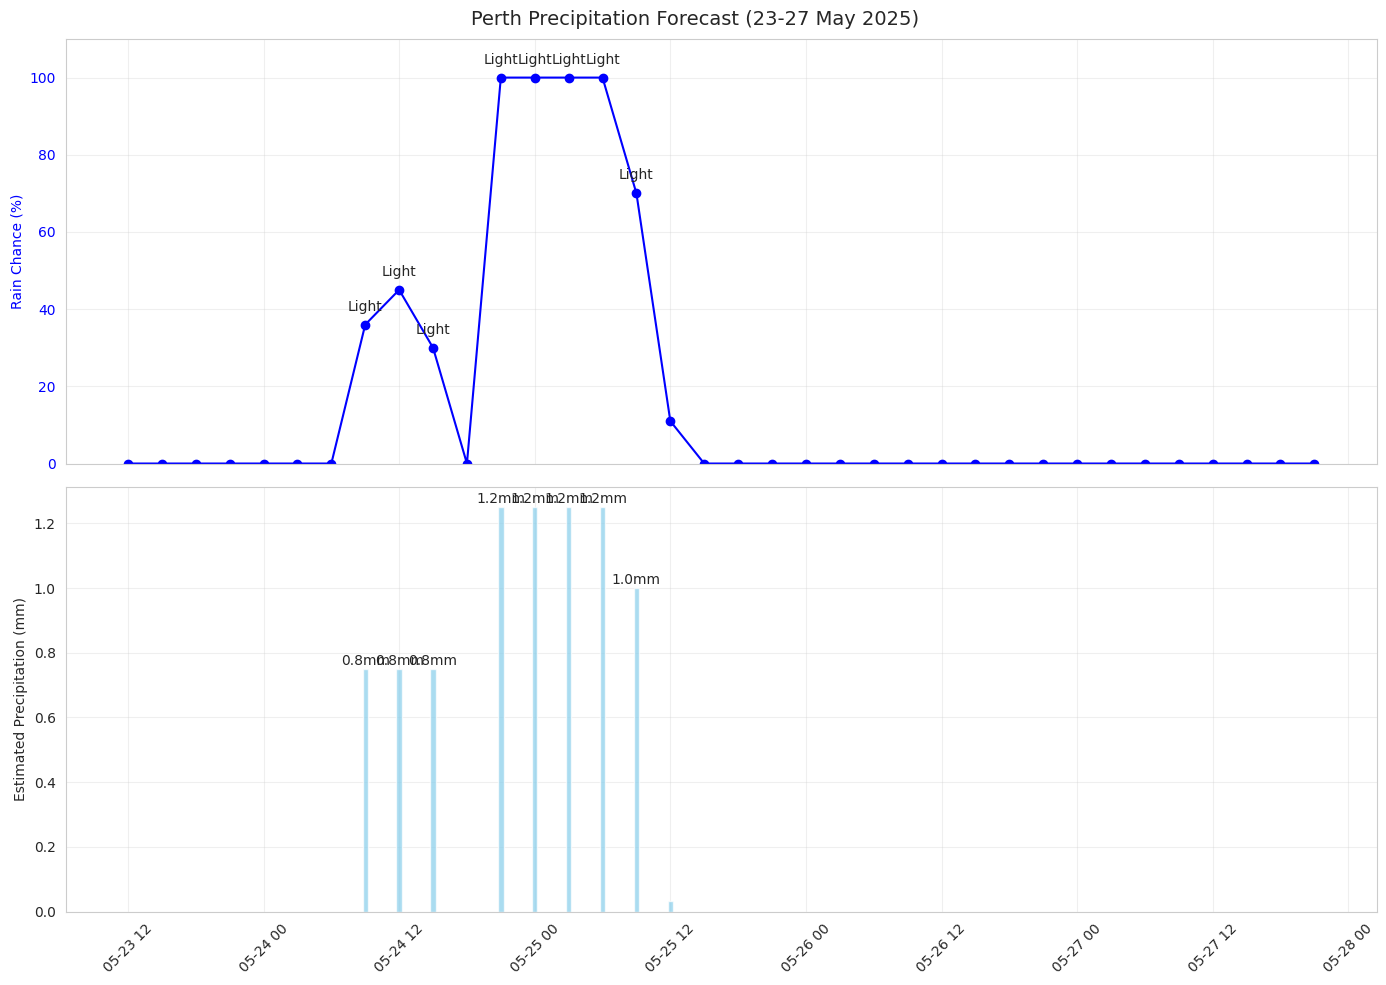

In [109]:

import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Full dataset from the weather forecast
weather_data = [
    # Friday, 2025-05-23
    {"time": "2025-05-23 12:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 75},
    {"time": "2025-05-23 15:00", "condition": "Scattered Clouds", "rain_chance": 0, "humidity": 68},
    {"time": "2025-05-23 18:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 58},
    {"time": "2025-05-23 21:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 47},

    # Saturday, 2025-05-24
    {"time": "2025-05-24 00:00", "condition": "Overcast Clouds", "rain_chance": 0, "humidity": 47},
    {"time": "2025-05-24 03:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 42},
    {"time": "2025-05-24 06:00", "condition": "Overcast Clouds", "rain_chance": 0, "humidity": 44},
    {"time": "2025-05-24 09:00", "condition": "Light Rain", "rain_chance": 36, "humidity": 63},
    {"time": "2025-05-24 12:00", "condition": "Light Rain", "rain_chance": 45, "humidity": 67},
    {"time": "2025-05-24 15:00", "condition": "Light Rain", "rain_chance": 30, "humidity": 63},
    {"time": "2025-05-24 18:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 60},
    {"time": "2025-05-24 21:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 71},

    # Sunday, 2025-05-25
    {"time": "2025-05-25 00:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 75},
    {"time": "2025-05-25 03:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 66},
    {"time": "2025-05-25 06:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 66},
    {"time": "2025-05-25 09:00", "condition": "Light Rain", "rain_chance": 70, "humidity": 69},
    {"time": "2025-05-25 12:00", "condition": "Scattered Clouds", "rain_chance": 11, "humidity": 70},
    {"time": "2025-05-25 15:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 68},
    {"time": "2025-05-25 18:00", "condition": "Scattered Clouds", "rain_chance": 0, "humidity": 54},
    {"time": "2025-05-25 21:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 60},

    # Monday, 2025-05-26
    {"time": "2025-05-26 00:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 60},
    {"time": "2025-05-26 03:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 43},
    {"time": "2025-05-26 06:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 34},
    {"time": "2025-05-26 09:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 37},
    {"time": "2025-05-26 12:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 46},
    {"time": "2025-05-26 15:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 55},
    {"time": "2025-05-26 18:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 59},
    {"time": "2025-05-26 21:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 61},

    # Tuesday, 2025-05-27
    {"time": "2025-05-27 00:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 62},
    {"time": "2025-05-27 03:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 44},
    {"time": "2025-05-27 06:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 32},
    {"time": "2025-05-27 09:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 34},
    {"time": "2025-05-27 12:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 41},
    {"time": "2025-05-27 15:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 43},
    {"time": "2025-05-27 18:00", "condition": "Scattered Clouds", "rain_chance": 0, "humidity": 46},
    {"time": "2025-05-27 21:00", "condition": "Overcast Clouds", "rain_chance": 0, "humidity": 50}
]

# Estimate precipitation amount based on conditions and rain chance
def estimate_precipitation(condition, rain_chance, humidity):
    if "Rain" in condition:
        base_amount = 0.5  # base mm for light rain
        if rain_chance == 100:
            return base_amount * 2.5
        elif rain_chance >= 70:
            return base_amount * 2
        elif rain_chance >= 30:
            return base_amount * 1.5
        else:
            return base_amount
    elif rain_chance > 0:
        return rain_chance/100 * 0.3  # very light precipitation
    else:
        return 0

# Process data
times = [datetime.strptime(entry["time"], "%Y-%m-%d %H:%M") for entry in weather_data]
rain_chances = [entry["rain_chance"] for entry in weather_data]
precipitation = [estimate_precipitation(entry["condition"], entry["rain_chance"], entry["humidity"])
                for entry in weather_data]
conditions = [entry["condition"] for entry in weather_data]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Rain chance and conditions
ax1.plot(times, rain_chances, 'b-', marker='o', label='Rain Chance (%)')
ax1.set_ylabel('Rain Chance (%)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(0, 110)
ax1.grid(True, alpha=0.3)

# Add condition markers
for i, condition in enumerate(conditions):
    if "Rain" in condition:
        ax1.annotate(condition.split()[0], (times[i], rain_chances[i]),
                    textcoords="offset points", xytext=(0,10), ha='center')

# Plot 2: Estimated precipitation
bars = ax2.bar(times, precipitation, width=0.02, color='skyblue', alpha=0.7)
ax2.set_ylabel('Estimated Precipitation (mm)')
ax2.grid(True, alpha=0.3)

# Highlight significant precipitation
for i, precip in enumerate(precipitation):
    if precip > 0.5:
        ax2.annotate(f"{precip:.1f}mm", (times[i], precip),
                   textcoords="offset points", xytext=(0,3), ha='center')

# Formatting
plt.suptitle('Perth Precipitation Forecast (23-27 May 2025)', y=0.98, fontsize=14)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

## 🤖 Natural Language Processing

In [114]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Your provided weather data
weather_data = [
    # Friday, 2025-05-23
    {"time": "2025-05-23 12:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 75, "temp": 12.4, "wind_speed": 4.9},
    {"time": "2025-05-23 15:00", "condition": "Scattered Clouds", "rain_chance": 0, "humidity": 68, "temp": 12.1, "wind_speed": 4.1},
    {"time": "2025-05-23 18:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 58, "temp": 9.2, "wind_speed": 4.6},
    {"time": "2025-05-23 21:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 47, "temp": 12.3, "wind_speed": 2.6},

    # Saturday, 2025-05-24
    {"time": "2025-05-24 00:00", "condition": "Overcast Clouds", "rain_chance": 0, "humidity": 47, "temp": 11.9, "wind_speed": 2.3},
    {"time": "2025-05-24 03:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 42, "temp": 14.2, "wind_speed": 2.5},
    {"time": "2025-05-24 06:00", "condition": "Overcast Clouds", "rain_chance": 0, "humidity": 44, "temp": 14.9, "wind_speed": 2.2},
    {"time": "2025-05-24 09:00", "condition": "Light Rain", "rain_chance": 36, "humidity": 63, "temp": 15.2, "wind_speed": 2.1},
    {"time": "2025-05-24 12:00", "condition": "Light Rain", "rain_chance": 45, "humidity": 67, "temp": 14.6, "wind_speed": 0.2},
    {"time": "2025-05-24 15:00", "condition": "Light Rain", "rain_chance": 30, "humidity": 63, "temp": 15.7, "wind_speed": 2.7},
    {"time": "2025-05-24 18:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 60, "temp": 16.1, "wind_speed": 3.5},
    {"time": "2025-05-24 21:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 71, "temp": 15.8, "wind_speed": 3.8},

    # Sunday, 2025-05-25
    {"time": "2025-05-25 00:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 75, "temp": 15.7, "wind_speed": 4.2},
    {"time": "2025-05-25 03:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 66, "temp": 17.6, "wind_speed": 4.0},
    {"time": "2025-05-25 06:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 66, "temp": 18.5, "wind_speed": 6.3},
    {"time": "2025-05-25 09:00", "condition": "Light Rain", "rain_chance": 70, "humidity": 69, "temp": 16.5, "wind_speed": 6.0},
    {"time": "2025-05-25 12:00", "condition": "Scattered Clouds", "rain_chance": 11, "humidity": 70, "temp": 14.8, "wind_speed": 3.6},
    {"time": "2025-05-25 15:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 68, "temp": 13.0, "wind_speed": 3.3},
    {"time": "2025-05-25 18:00", "condition": "Scattered Clouds", "rain_chance": 0, "humidity": 54, "temp": 12.6, "wind_speed": 4.1},
    {"time": "2025-05-25 21:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 60, "temp": 10.7, "wind_speed": 3.2},

    # Monday, 2025-05-26
    {"time": "2025-05-26 00:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 60, "temp": 10.8, "wind_speed": 3.2},
    {"time": "2025-05-26 03:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 43, "temp": 15.5, "wind_speed": 3.9},
    {"time": "2025-05-26 06:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 34, "temp": 18.3, "wind_speed": 4.1},
    {"time": "2025-05-26 09:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 37, "temp": 17.9, "wind_speed": 4.3},
    {"time": "2025-05-26 12:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 46, "temp": 15.6, "wind_speed": 4.0},
    {"time": "2025-05-26 15:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 55, "temp": 13.7, "wind_speed": 4.9},
    {"time": "2025-05-26 18:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 59, "temp": 13.2, "wind_speed": 5.6},
    {"time": "2025-05-26 21:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 61, "temp": 12.5, "wind_speed": 5.8},

    # Tuesday, 2025-05-27
    {"time": "2025-05-27 00:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 62, "temp": 12.2, "wind_speed": 6.0},
    {"time": "2025-05-27 03:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 44, "temp": 17.1, "wind_speed": 6.7},
    {"time": "2025-05-27 06:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 32, "temp": 20.2, "wind_speed": 6.3},
    {"time": "2025-05-27 09:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 34, "temp": 19.6, "wind_speed": 4.5},
    {"time": "2025-05-27 12:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 41, "temp": 16.8, "wind_speed": 4.9},
    {"time": "2025-05-27 15:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 43, "temp": 16.0, "wind_speed": 6.2},
    {"time": "2025-05-27 18:00", "condition": "Scattered Clouds", "rain_chance": 0, "humidity": 46, "temp": 15.1, "wind_speed": 6.2},
    {"time": "2025-05-27 21:00", "condition": "Overcast Clouds", "rain_chance": 0, "humidity": 50, "temp": 14.1, "wind_speed": 6.6}
]

def plot_weather(data, attribute):
    """Generate weather visualizations from our dataset"""
    dates = []
    values = []

    for entry in data:
        dt = datetime.strptime(entry['time'], '%Y-%m-%d %H:%M')
        dates.append(dt)

        if attribute == 'temperature':
            values.append(entry['temp'])
        elif attribute == 'humidity':
            values.append(entry['humidity'])
        elif attribute == 'rain':
            # Estimate precipitation amount based on rain chance
            values.append(entry['rain_chance'] / 100 * 2)  # Scale to mm

    plt.figure(figsize=(10, 5))
    plt.plot(dates, values, marker='o')

    if attribute == 'temperature':
        plt.title(f"Temperature Trend in Perth")
        plt.ylabel('Temperature (°C)')
    elif attribute == 'humidity':
        plt.title(f"Humidity Trend in Perth")
        plt.ylabel('Humidity (%)')
    elif attribute == 'rain':
        plt.title(f"Rain Chance/Amount in Perth")
        plt.ylabel('Rain (mm estimated)')

    plt.xlabel('Date/Time')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def show_weather_menu():
    """Interactive weather dashboard using our dataset"""
    # Create widgets
    time_input = widgets.Dropdown(
        options=['Next 3 hours', 'Today', 'Tomorrow', 'Next 5 days'],
        description='Timeframe:'
    )

    attribute_input = widgets.Dropdown(
        options=['temperature', 'humidity', 'rain'],
        description='Attribute:'
    )

    submit_button = widgets.Button(
        description='Get Weather',
        button_style='success',
        icon='cloud'
    )

    output = widgets.Output()

    # Button click handler
    def on_submit(b):
        with output:
            clear_output()
            timeframe = time_input.value
            attribute = attribute_input.value

            print(f"🌤 Showing {attribute} data for Perth ({timeframe})...")

            now = datetime.strptime("2025-05-23 12:00", "%Y-%m-%d %H:%M")  # Using first date in dataset as "now"

            # Filter data based on timeframe
            if timeframe == 'Next 3 hours':
                filtered_data = [entry for entry in weather_data
                               if datetime.strptime(entry['time'], "%Y-%m-%d %H:%M") <= now + timedelta(hours=3)]
            elif timeframe == 'Today':
                today_str = now.strftime('%Y-%m-%d')
                filtered_data = [entry for entry in weather_data
                               if entry['time'].startswith(today_str)]
            elif timeframe == 'Tomorrow':
                tomorrow = (now + timedelta(days=1)).strftime('%Y-%m-%d')
                filtered_data = [entry for entry in weather_data
                               if entry['time'].startswith(tomorrow)]
            else:  # Next 5 days
                filtered_data = weather_data

            # Show visualization
            plot_weather(filtered_data, attribute)

            # Display current conditions
            current = weather_data[0]
            print(f"\nCurrent conditions at {current['time']}:")
            print(f"- Temperature: {current['temp']}°C")
            print(f"- Humidity: {current['humidity']}%")
            print(f"- Weather: {current['condition']}")
            print(f"- Wind: {current['wind_speed']} m/s")
            print(f"- Rain chance: {current['rain_chance']}%")

    submit_button.on_click(on_submit)

    # Display the dashboard
    display(widgets.VBox([
        widgets.HTML("<h2>🌦 Perth Weather Dashboard</h2>"),
        time_input,
        attribute_input,
        submit_button,
        output
    ]))

# Run the dashboard
show_weather_menu()

## 🧭 User Interface

In [120]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Your provided weather data
weather_data = [
    # Friday, 2025-05-23
    {"time": "2025-05-23 12:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 75, "temp": 12.4, "wind_speed": 4.9},
    {"time": "2025-05-23 15:00", "condition": "Scattered Clouds", "rain_chance": 0, "humidity": 68, "temp": 12.1, "wind_speed": 4.1},
    {"time": "2025-05-23 18:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 58, "temp": 9.2, "wind_speed": 4.6},
    {"time": "2025-05-23 21:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 47, "temp": 12.3, "wind_speed": 2.6},

    # Saturday, 2025-05-24
    {"time": "2025-05-24 00:00", "condition": "Overcast Clouds", "rain_chance": 0, "humidity": 47, "temp": 11.9, "wind_speed": 2.3},
    {"time": "2025-05-24 03:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 42, "temp": 14.2, "wind_speed": 2.5},
    {"time": "2025-05-24 06:00", "condition": "Overcast Clouds", "rain_chance": 0, "humidity": 44, "temp": 14.9, "wind_speed": 2.2},
    {"time": "2025-05-24 09:00", "condition": "Light Rain", "rain_chance": 36, "humidity": 63, "temp": 15.2, "wind_speed": 2.1},
    {"time": "2025-05-24 12:00", "condition": "Light Rain", "rain_chance": 45, "humidity": 67, "temp": 14.6, "wind_speed": 0.2},
    {"time": "2025-05-24 15:00", "condition": "Light Rain", "rain_chance": 30, "humidity": 63, "temp": 15.7, "wind_speed": 2.7},
    {"time": "2025-05-24 18:00", "condition": "Broken Clouds", "rain_chance": 0, "humidity": 60, "temp": 16.1, "wind_speed": 3.5},
    {"time": "2025-05-24 21:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 71, "temp": 15.8, "wind_speed": 3.8},

    # Sunday, 2025-05-25
    {"time": "2025-05-25 00:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 75, "temp": 15.7, "wind_speed": 4.2},
    {"time": "2025-05-25 03:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 66, "temp": 17.6, "wind_speed": 4.0},
    {"time": "2025-05-25 06:00", "condition": "Light Rain", "rain_chance": 100, "humidity": 66, "temp": 18.5, "wind_speed": 6.3},
    {"time": "2025-05-25 09:00", "condition": "Light Rain", "rain_chance": 70, "humidity": 69, "temp": 16.5, "wind_speed": 6.0},
    {"time": "2025-05-25 12:00", "condition": "Scattered Clouds", "rain_chance": 11, "humidity": 70, "temp": 14.8, "wind_speed": 3.6},
    {"time": "2025-05-25 15:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 68, "temp": 13.0, "wind_speed": 3.3},
    {"time": "2025-05-25 18:00", "condition": "Scattered Clouds", "rain_chance": 0, "humidity": 54, "temp": 12.6, "wind_speed": 4.1},
    {"time": "2025-05-25 21:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 60, "temp": 10.7, "wind_speed": 3.2},

    # Monday, 2025-05-26
    {"time": "2025-05-26 00:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 60, "temp": 10.8, "wind_speed": 3.2},
    {"time": "2025-05-26 03:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 43, "temp": 15.5, "wind_speed": 3.9},
    {"time": "2025-05-26 06:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 34, "temp": 18.3, "wind_speed": 4.1},
    {"time": "2025-05-26 09:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 37, "temp": 17.9, "wind_speed": 4.3},
    {"time": "2025-05-26 12:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 46, "temp": 15.6, "wind_speed": 4.0},
    {"time": "2025-05-26 15:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 55, "temp": 13.7, "wind_speed": 4.9},
    {"time": "2025-05-26 18:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 59, "temp": 13.2, "wind_speed": 5.6},
    {"time": "2025-05-26 21:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 61, "temp": 12.5, "wind_speed": 5.8},

    # Tuesday, 2025-05-27
    {"time": "2025-05-27 00:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 62, "temp": 12.2, "wind_speed": 6.0},
    {"time": "2025-05-27 03:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 44, "temp": 17.1, "wind_speed": 6.7},
    {"time": "2025-05-27 06:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 32, "temp": 20.2, "wind_speed": 6.3},
    {"time": "2025-05-27 09:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 34, "temp": 19.6, "wind_speed": 4.5},
    {"time": "2025-05-27 12:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 41, "temp": 16.8, "wind_speed": 4.9},
    {"time": "2025-05-27 15:00", "condition": "Clear Sky", "rain_chance": 0, "humidity": 43, "temp": 16.0, "wind_speed": 6.2},
    {"time": "2025-05-27 18:00", "condition": "Scattered Clouds", "rain_chance": 0, "humidity": 46, "temp": 15.1, "wind_speed": 6.2},
    {"time": "2025-05-27 21:00", "condition": "Overcast Clouds", "rain_chance": 0, "humidity": 50, "temp": 14.1, "wind_speed": 6.6}
]

def create_weather_menu():
    """Create an interactive weather dashboard menu"""
    # Create widgets
    timeframe = widgets.Dropdown(
        options=['Current', 'Today', 'Tomorrow', 'Next 3 Days', 'Full Forecast'],
        value='Current',
        description='Timeframe:',
        style={'description_width': 'initial'}
    )

    view_type = widgets.Dropdown(
        options=['Summary', 'Temperature', 'Humidity', 'Rain', 'Wind'],
        value='Summary',
        description='View:',
        style={'description_width': 'initial'}
    )

    details_level = widgets.RadioButtons(
        options=['Basic', 'Detailed'],
        value='Basic',
        description='Detail Level:',
        style={'description_width': 'initial'}
    )

    update_button = widgets.Button(
        description='Update View',
        button_style='info',
        tooltip='Click to update the display'
    )

    output = widgets.Output()

    # Define button click handler
    def on_button_click(b):
        with output:
            clear_output()
            display_weather_data(
                timeframe=timeframe.value,
                view=view_type.value,
                detail=details_level.value
            )

    update_button.on_click(on_button_click)

    # Display the menu
    display(widgets.VBox([
        widgets.HTML("<h2>🌤 Perth Weather Dashboard</h2>"),
        widgets.HBox([timeframe, view_type]),
        details_level,
        update_button,
        output
    ]))

def display_weather_data(timeframe='Current', view='Summary', detail='Basic'):
    """Display weather data based on user selections"""
    # Filter data based on timeframe
    now = datetime.strptime("2025-05-23 12:00", "%Y-%m-%d %H:%M")  # Reference time

    if timeframe == 'Current':
        filtered_data = [weather_data[0]]
    elif timeframe == 'Today':
        today_str = now.strftime('%Y-%m-%d')
        filtered_data = [entry for entry in weather_data if entry['time'].startswith(today_str)]
    elif timeframe == 'Tomorrow':
        tomorrow = (now + timedelta(days=1)).strftime('%Y-%m-%d')
        filtered_data = [entry for entry in weather_data if entry['time'].startswith(tomorrow)]
    elif timeframe == 'Next 3 Days':
        end_date = (now + timedelta(days=3)).strftime('%Y-%m-%d')
        filtered_data = [entry for entry in weather_data
                        if datetime.strptime(entry['time'], "%Y-%m-%d %H:%M") <= datetime.strptime(end_date, "%Y-%m-%d")]
    else:  # Full Forecast
        filtered_data = weather_data

    # Display based on view type
    if view == 'Summary':
        show_summary_view(filtered_data, detail)
    elif view == 'Temperature':
        plot_temperature(filtered_data, detail)
    elif view == 'Humidity':
        plot_humidity(filtered_data, detail)
    elif view == 'Rain':
        plot_rain(filtered_data, detail)
    elif view == 'Wind':
        plot_wind(filtered_data, detail)

def show_summary_view(data, detail_level):
    """Display a summary of weather conditions"""
    print(f"📅 Weather Summary ({len(data)} time periods)")
    print("=======================================")

    if detail_level == 'Basic':
        # Show condensed information
        for entry in data:
            time = datetime.strptime(entry['time'], "%Y-%m-%d %H:%M").strftime("%a %H:%M")
            print(f"{time}: {entry['condition']}, {entry['temp']}°C")
    else:
        # Show detailed information
        for entry in data:
            time = datetime.strptime(entry['time'], "%Y-%m-%d %H:%M").strftime("%a %H:%M")
            print(f"\n⏰ {time}")
            print(f"🌡 Temp: {entry['temp']}°C")
            print(f"💧 Humidity: {entry['humidity']}%")
            print(f"🌬 Wind: {entry['wind_speed']} m/s")
            print(f"🌧 Rain chance: {entry['rain_chance']}%")
            print(f"☁️ Conditions: {entry['condition']}")

def plot_temperature(data, detail_level):
    """Plot temperature data"""
    times = [datetime.strptime(entry['time'], "%Y-%m-%d %H:%M") for entry in data]
    temps = [entry['temp'] for entry in data]

    plt.figure(figsize=(10, 5))
    plt.plot(times, temps, marker='o', color='red')
    plt.title("Temperature Forecast")
    plt.ylabel("Temperature (°C)")
    plt.xlabel("Time")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    if detail_level == 'Detailed':
        print("\nDetailed Temperature Data:")
        for entry in data:
            time = datetime.strptime(entry['time'], "%Y-%m-%d %H:%M").strftime("%a %H:%M")
            print(f"{time}: {entry['temp']}°C")

def plot_humidity(data, detail_level):
    """Plot humidity data"""
    times = [datetime.strptime(entry['time'], "%Y-%m-%d %H:%M") for entry in data]
    humidities = [entry['humidity'] for entry in data]

    plt.figure(figsize=(10, 5))
    plt.plot(times, humidities, marker='o', color='blue')
    plt.title("Humidity Forecast")
    plt.ylabel("Humidity (%)")
    plt.xlabel("Time")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_rain(data, detail_level):
    """Plot rain chance data"""
    times = [datetime.strptime(entry['time'], "%Y-%m-%d %H:%M") for entry in data]
    rain_chances = [entry['rain_chance'] for entry in data]

    plt.figure(figsize=(10, 5))
    plt.bar(times, rain_chances, color='lightblue', width=0.02)
    plt.title("Rain Chance Forecast")
    plt.ylabel("Rain Chance (%)")
    plt.xlabel("Time")
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    if detail_level == 'Detailed':
        print("\nRain Forecast Details:")
        for entry in data:
            if entry['rain_chance'] > 0:
                time = datetime.strptime(entry['time'], "%Y-%m-%d %H:%M").strftime("%a %H:%M")
                print(f"{time}: {entry['rain_chance']}% chance of {entry['condition']}")

def plot_wind(data, detail_level):
    """Plot wind speed data"""
    times = [datetime.strptime(entry['time'], "%Y-%m-%d %H:%M") for entry in data]
    wind_speeds = [entry['wind_speed'] for entry in data]

    plt.figure(figsize=(10, 5))
    plt.plot(times, wind_speeds, marker='o', color='green')
    plt.title("Wind Speed Forecast")
    plt.ylabel("Wind Speed (m/s)")
    plt.xlabel("Time")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the dashboard
create_weather_menu()

## 🧩 Main Application Logic

In [118]:
import pyinputplus as pyip
from datetime import datetime, timedelta

# Sample simplified weather dataset
weather_data = {
    "perth": {
        "2025-05-23": {
            "temperature": "9.2°C to 12.4°C",
            "conditions": "Scattered Clouds, Clear Sky, Broken Clouds",
            "rain_chance": "0%",
            "wind": "4.9 m/s SSE to 2.6 m/s ENE",
            "clouds": "0% to 79%"
        },
        "2025-05-24": {
            "temperature": "11.9°C to 16.1°C",
            "conditions": "Overcast Clouds, Broken Clouds, Light Rain",
            "rain_chance": "0% to 100%",
            "wind": "2.3 m/s ENE to 3.8 m/s SW",
            "clouds": "69% to 90%"
        },
        "2025-05-25": {
            "temperature": "10.7°C to 18.5°C",
            "conditions": "Scattered Clouds, Clear Sky, Light Rain",
            "rain_chance": "0% to 100%",
            "wind": "3.2 m/s ESE to 6.3 m/s SW",
            "clouds": "8% to 100%"
        }
    }
}

# Menu interface using PyInputPlus
def weather_menu_pyinputplus():
    # Skip location menu since we only support Perth
    print("📍 Location: Perth (fixed)")
    time_period = pyip.inputMenu(['Today', 'Tomorrow', 'Sunday'], prompt='Select a day:\n', numbered=True)
    attribute = pyip.inputMenu(['Temperature', 'Rain', 'Wind', 'Clouds', 'General'], prompt='Select weather detail:\n', numbered=True)

    return {
        "location": "perth",
        "time_period": time_period.lower(),
        "attribute": attribute.lower()
    }

# Date conversion
def get_date_from_period(period):
    today = datetime(2025, 5, 23)  # Simulated current date
    mapping = {
        "today": 0,
        "tomorrow": 1,
        "sunday": (6 - today.weekday()) % 7
    }
    days_ahead = mapping.get(period, 0)
    target_date = today + timedelta(days=days_ahead)
    return target_date.strftime("%Y-%m-%d")

# Generate the weather response
def generate_weather_response(parsed_question, weather_data):
    location = parsed_question["location"]
    period = parsed_question["time_period"]
    attribute = parsed_question["attribute"]
    date_key = get_date_from_period(period)

    day_data = weather_data.get(location, {}).get(date_key)

    if not day_data:
        return f"❌ No weather data available for {location.title()} on {date_key}."

    if attribute == "temperature":
        return f"🌡 The temperature in {location.title()} on {date_key} will be {day_data['temperature']}."
    elif attribute == "rain":
        return f"🌧 Rain chance in {location.title()} on {date_key} is {day_data['rain_chance']}."
    elif attribute == "wind":
        return f"💨 Wind conditions in {location.title()} on {date_key}: {day_data['wind']}."
    elif attribute == "clouds":
        return f"☁️ Cloud coverage in {location.title()} on {date_key}: {day_data['clouds']}."
    elif attribute == "general":
        return (f"📋 General forecast for {location.title()} on {date_key}:\n"
                f"{day_data['conditions']}, Temps: {day_data['temperature']}, "
                f"Rain: {day_data['rain_chance']}.")
    else:
        return "❓ Unknown weather attribute requested."

# Run the app
def main():
    parsed_question = weather_menu_pyinputplus()
    response = generate_weather_response(parsed_question, weather_data)
    print("\n📡 Weather Report")
    print(response)

if __name__ == "__main__":
    main()


📍 Location: Perth (fixed)
Select a day:
1. Today
2. Tomorrow
3. Sunday
1
Select weather detail:
1. Temperature
2. Rain
3. Wind
4. Clouds
5. General
1

📡 Weather Report
🌡 The temperature in Perth on 2025-05-23 will be 9.2°C to 12.4°C.


## 🧪 Testing and Examples

In [122]:
from datetime import datetime, timedelta

# -------------------------------
# Sample Weather Data
# -------------------------------
weather_data = {
    "perth": {
        "2025-05-23": {
            "temperature": "9.2°C to 12.4°C",
            "conditions": "Scattered Clouds, Clear Sky, Broken Clouds",
            "rain_chance": "0%",
            "wind": "4.9 m/s SSE to 2.6 m/s ENE",
            "clouds": "0% to 79%"
        },
        "2025-05-24": {
            "temperature": "11.9°C to 16.1°C",
            "conditions": "Overcast Clouds, Broken Clouds, Light Rain",
            "rain_chance": "0% to 100%",
            "wind": "2.3 m/s ENE to 3.8 m/s SW",
            "clouds": "69% to 90%"
        },
        "2025-05-25": {
            "temperature": "10.7°C to 18.5°C",
            "conditions": "Scattered Clouds, Clear Sky, Light Rain",
            "rain_chance": "0% to 100%",
            "wind": "3.2 m/s ESE to 6.3 m/s SW",
            "clouds": "8% to 100%"
        }
    }
}

# -------------------------------
# Function: get_date_from_period()
# -------------------------------
def get_date_from_period(period):
    today = datetime(2025, 5, 23)  # Fixed reference date
    mapping = {
        "today": 0,
        "tomorrow": 1,
        "sunday": (6 - today.weekday()) % 7  # Days until next Sunday
    }
    days_ahead = mapping.get(period, 0)
    target_date = today + timedelta(days=days_ahead)
    return target_date.strftime("%Y-%m-%d")

# -------------------------------
# Function: generate_weather_response()
# -------------------------------
def generate_weather_response(parsed_question, weather_data):
    location = parsed_question["location"]
    period = parsed_question["time_period"]
    attribute = parsed_question["attribute"]
    date_key = get_date_from_period(period)

    day_data = weather_data.get(location, {}).get(date_key)

    if not day_data:
        return f"❌ No weather data available for {location.title()} on {date_key}."

    if attribute == "temperature":
        return f"🌡 The temperature in {location.title()} on {date_key} will be {day_data['temperature']}."
    elif attribute == "rain":
        return f"🌧 Rain chance in {location.title()} on {date_key} is {day_data['rain_chance']}."
    elif attribute == "wind":
        return f"💨 Wind conditions in {location.title()} on {date_key}: {day_data['wind']}."
    elif attribute == "clouds":
        return f"☁️ Cloud coverage in {location.title()} on {date_key}: {day_data['clouds']}."
    elif attribute == "general":
        return (f"📋 General forecast for {location.title()} on {date_key}:\n"
                f"{day_data['conditions']}, Temps: {day_data['temperature']}, "
                f"Rain: {day_data['rain_chance']}.")
    else:
        return "❓ Unknown weather attribute requested."

# -------------------------------
# Test Cases
# -------------------------------
print("✅ Test get_date_from_period:")
print("today     ➤", get_date_from_period("today"))     # → '2025-05-23'
print("tomorrow  ➤", get_date_from_period("tomorrow"))  # → '2025-05-24'
print("sunday    ➤", get_date_from_period("sunday"))    # → '2025-05-25'

print("\n✅ Test generate_weather_response:")
example_inputs = [
    {"location": "perth", "time_period": "today", "attribute": "temperature"},
    {"location": "perth", "time_period": "tomorrow", "attribute": "rain"},
    {"location": "perth", "time_period": "sunday", "attribute": "wind"},
    {"location": "perth", "time_period": "today", "attribute": "clouds"},
    {"location": "perth", "time_period": "sunday", "attribute": "general"},
]

for q in example_inputs:
    print(f"\nInput: {q}")
    print("Output:", generate_weather_response(q, weather_data))


✅ Test get_date_from_period:
today     ➤ 2025-05-23
tomorrow  ➤ 2025-05-24
sunday    ➤ 2025-05-25

✅ Test generate_weather_response:

Input: {'location': 'perth', 'time_period': 'today', 'attribute': 'temperature'}
Output: 🌡 The temperature in Perth on 2025-05-23 will be 9.2°C to 12.4°C.

Input: {'location': 'perth', 'time_period': 'tomorrow', 'attribute': 'rain'}
Output: 🌧 Rain chance in Perth on 2025-05-24 is 0% to 100%.

Input: {'location': 'perth', 'time_period': 'sunday', 'attribute': 'wind'}
Output: 💨 Wind conditions in Perth on 2025-05-25: 3.2 m/s ESE to 6.3 m/s SW.

Input: {'location': 'perth', 'time_period': 'today', 'attribute': 'clouds'}
Output: ☁️ Cloud coverage in Perth on 2025-05-23: 0% to 79%.

Input: {'location': 'perth', 'time_period': 'sunday', 'attribute': 'general'}
Output: 📋 General forecast for Perth on 2025-05-25:
Scattered Clouds, Clear Sky, Light Rain, Temps: 10.7°C to 18.5°C, Rain: 0% to 100%.


## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.